In [10]:
import pandas as pd
import os
import sqlite3
from sqlite3 import Error
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
eshop = pd.read_csv('C:\Asus WebStorage\psabin@gmail.com\MySyncFolder\Data Science Course\E-Commerce\Sample-Superstore3.csv')
path = r'C:\\Asus WebStorage\\psabin@gmail.com\\MySyncFolder\\Data Science Course\\E-Commerce\\'
eshop_db = sqlite3.connect('eshop_database.db')
c = eshop_db.cursor()

C:\Users\psabi\AppData\Local\Temp\ipykernel_13500\3245292933.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(df))


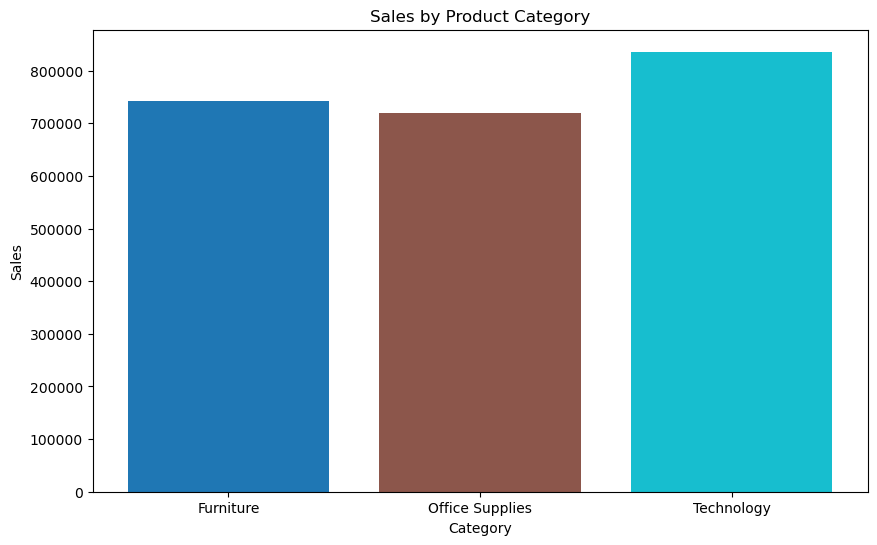

In [11]:
# Execute the query
c.execute('''
SELECT Category, ROUND(SUM(Sales),2) AS 'Category Sales'
FROM OrderDetails
JOIN Products ON OrderDetails.ProductID=Products.ProductID
GROUP BY Products.Category''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Category', 'Category Sales'])

# Get colors from the 'tab10' colormap
colors = cm.get_cmap('tab10', len(df))

# Create a bar chart with 'tab10' colors
plt.figure(figsize=(10,6))
plt.bar(df['Category'], df['Category Sales'], color=[colors(i) for i in range(len(df))])
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales by Product Category')
plt.show()




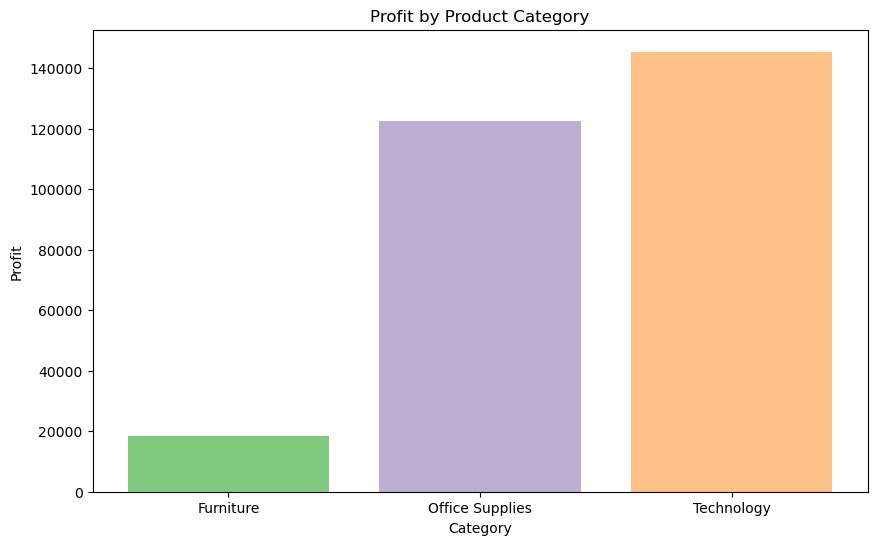

In [19]:
# Execute the query
c.execute('''
SELECT Category, ROUND(SUM(Profit),2) AS 'Category Profit'
FROM OrderDetails
JOIN Products ON OrderDetails.ProductID=Products.ProductID
GROUP BY Products.Category''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Category', 'Category Profit'])

# Get colors from the 'tab10' colormap
colors = plt.colormaps.get_cmap('Accent')

# Create a bar chart with 'tab10' colors
plt.figure(figsize=(10,6))
plt.bar(df['Category'], df['Category Profit'], color=[colors(i) for i in range(len(df))])
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit by Product Category')
plt.show()

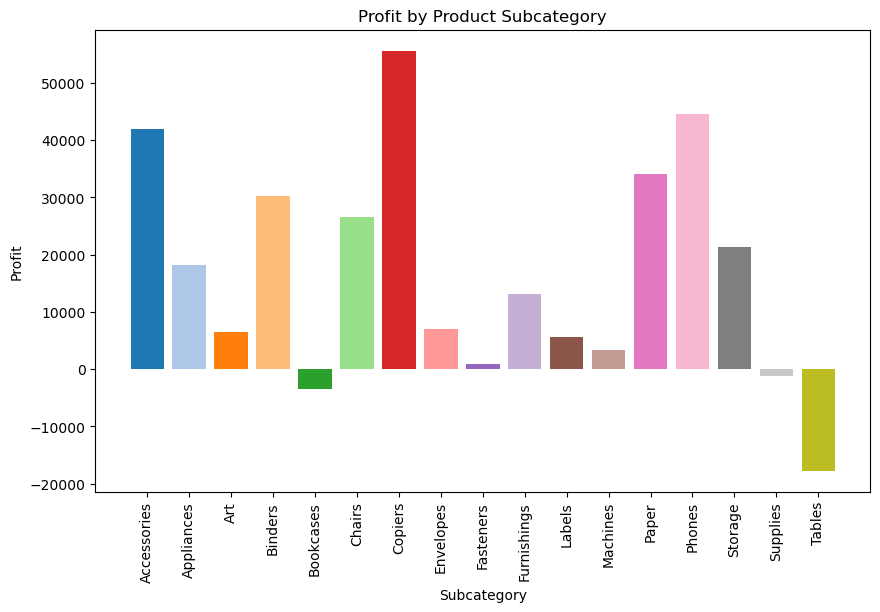

In [22]:
# Execute the query
c.execute('''
SELECT SubCategory, ROUND(SUM(Profit),2) AS 'Subcategory Profit'
FROM OrderDetails
JOIN Products ON OrderDetails.ProductID=Products.ProductID
GROUP BY Products.SubCategory''')

# Fetch the results
results = c.fetchall()

# Convert to DataFrame
df = pd.DataFrame(results, columns=['Subcategory', 'Subcategory Profit'])

# Get colors from the 'tab20' colormap
colors = plt.colormaps.get_cmap('tab20')

# Create a bar chart with 'Accent' colors
plt.figure(figsize=(10,6))
plt.bar(df['Subcategory'], df['Subcategory Profit'], color=[colors(i) for i in range(len(df))])
plt.xlabel('Subcategory')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.title('Profit by Product Subcategory')
plt.show()